# Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

### Задача 1. Минимизация гладкой функции

In [2]:
import math as m


In [20]:
import numpy as np
def evalFunctionValue(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)

In [43]:
print evalFunctionValue(25.88019265)

-11.898894666


[  1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5
   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5  12.   12.5
  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5  18.   18.5
  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5  24.   24.5
  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5  30.   30.5]


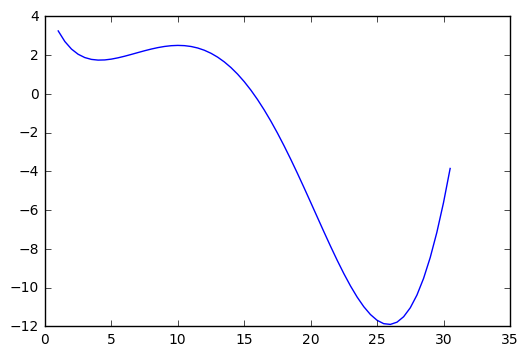

In [24]:
from matplotlib import pylab as plt

x = np.arange(1, 31, 0.5)
print x
y = evalFunctionValue(x)
plt.plot(x, y)
plt.show()

In [44]:
from scipy.optimize import minimize

def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)
min = minimize(f, 25, method='BFGS')
print min

#можно сдлеать вывод, что по-умолчанию Minimize возвращает локальный минимум в зависимости от параметра который передается в метод.
#first answer: 1.74526829034 ~ 1.75
#second: -11.8988946549 ~ -11.9


      fun: -11.89889466596626
 hess_inv: array([[ 1.67418754]])
      jac: array([ -4.29153442e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([ 25.88018592])


### Задача 2. Глобальная оптимизация

In [47]:
#using method of differential evolution
from scipy.optimize import differential_evolution
min = differential_evolution(f, [(1,30)])
print min

     fun: array([-11.89889467])
     jac: array([  1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 68
     nit: 3
 success: True
       x: array([ 25.88019342])


### Задача 3. Минимизация негладкой функции

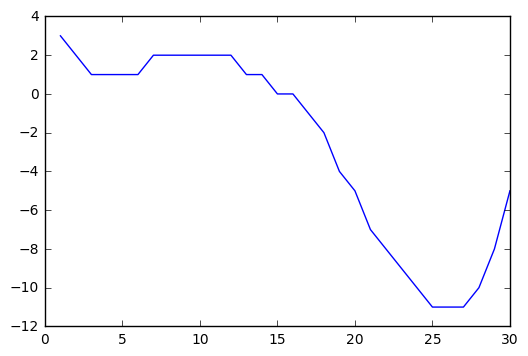

In [51]:
def funcH(x):
    return int(evalFunctionValue(x))
def prepareHvalues():
    result = []
    for n in np.arange(1, 31, 1):
        result.append(funcH(n))
    return result
    
x = np.arange(1, 31, 1)
y = prepareHvalues()

plt.plot(x, y)
plt.show()

In [59]:
min = minimize(funcH, 22, method='BFGS')
print min

      fun: -8
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 22.])


In [54]:
dif_min = differential_evolution(funcH, [(1, 30)])
print dif_min

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 6
 success: True
       x: array([ 27.49500402])
